<a href="https://colab.research.google.com/github/mayalinetsky/HousePricesKaggle/blob/master/Housing_yair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

whole_data = pd.read_csv('/content/houses_train.csv')
df = whole_data.copy()
data = df.drop(['SalePrice'], axis=1)
target = df['SalePrice']

In [ ]:
data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [ ]:
categorical_columns = data.describe(include=[object]).T.index
numeric_columns = data.describe(include=[np.number]).T.index

In [ ]:
# Correlation of numeric columns (should we drop features with low correlation?):
data[numeric_columns].corrwith(target).sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
dtype: float64

In [ ]:
# Finding highly-correlated pairs of features (should be dropped?)
num_corr = data[numeric_columns].corr()
correlation_matrix = data[numeric_columns].corr()
threshold = 0.7
highly_correlated_numeric_features = []

for i in range(len(numeric_columns)):
  for j in range(i+1, len(numeric_columns)):
    feature1 = numeric_columns[i]
    feature2 = numeric_columns[j]
    correlation = correlation_matrix.iloc[i,j]

    if correlation > threshold:
      highly_correlated_numeric_features.append((feature1, feature2, round(correlation, 3)))

print(highly_correlated_numeric_features)

[('YearBuilt', 'GarageYrBlt', 0.826), ('TotalBsmtSF', '1stFlrSF', 0.82), ('GrLivArea', 'TotRmsAbvGrd', 0.825), ('GarageCars', 'GarageArea', 0.882)]


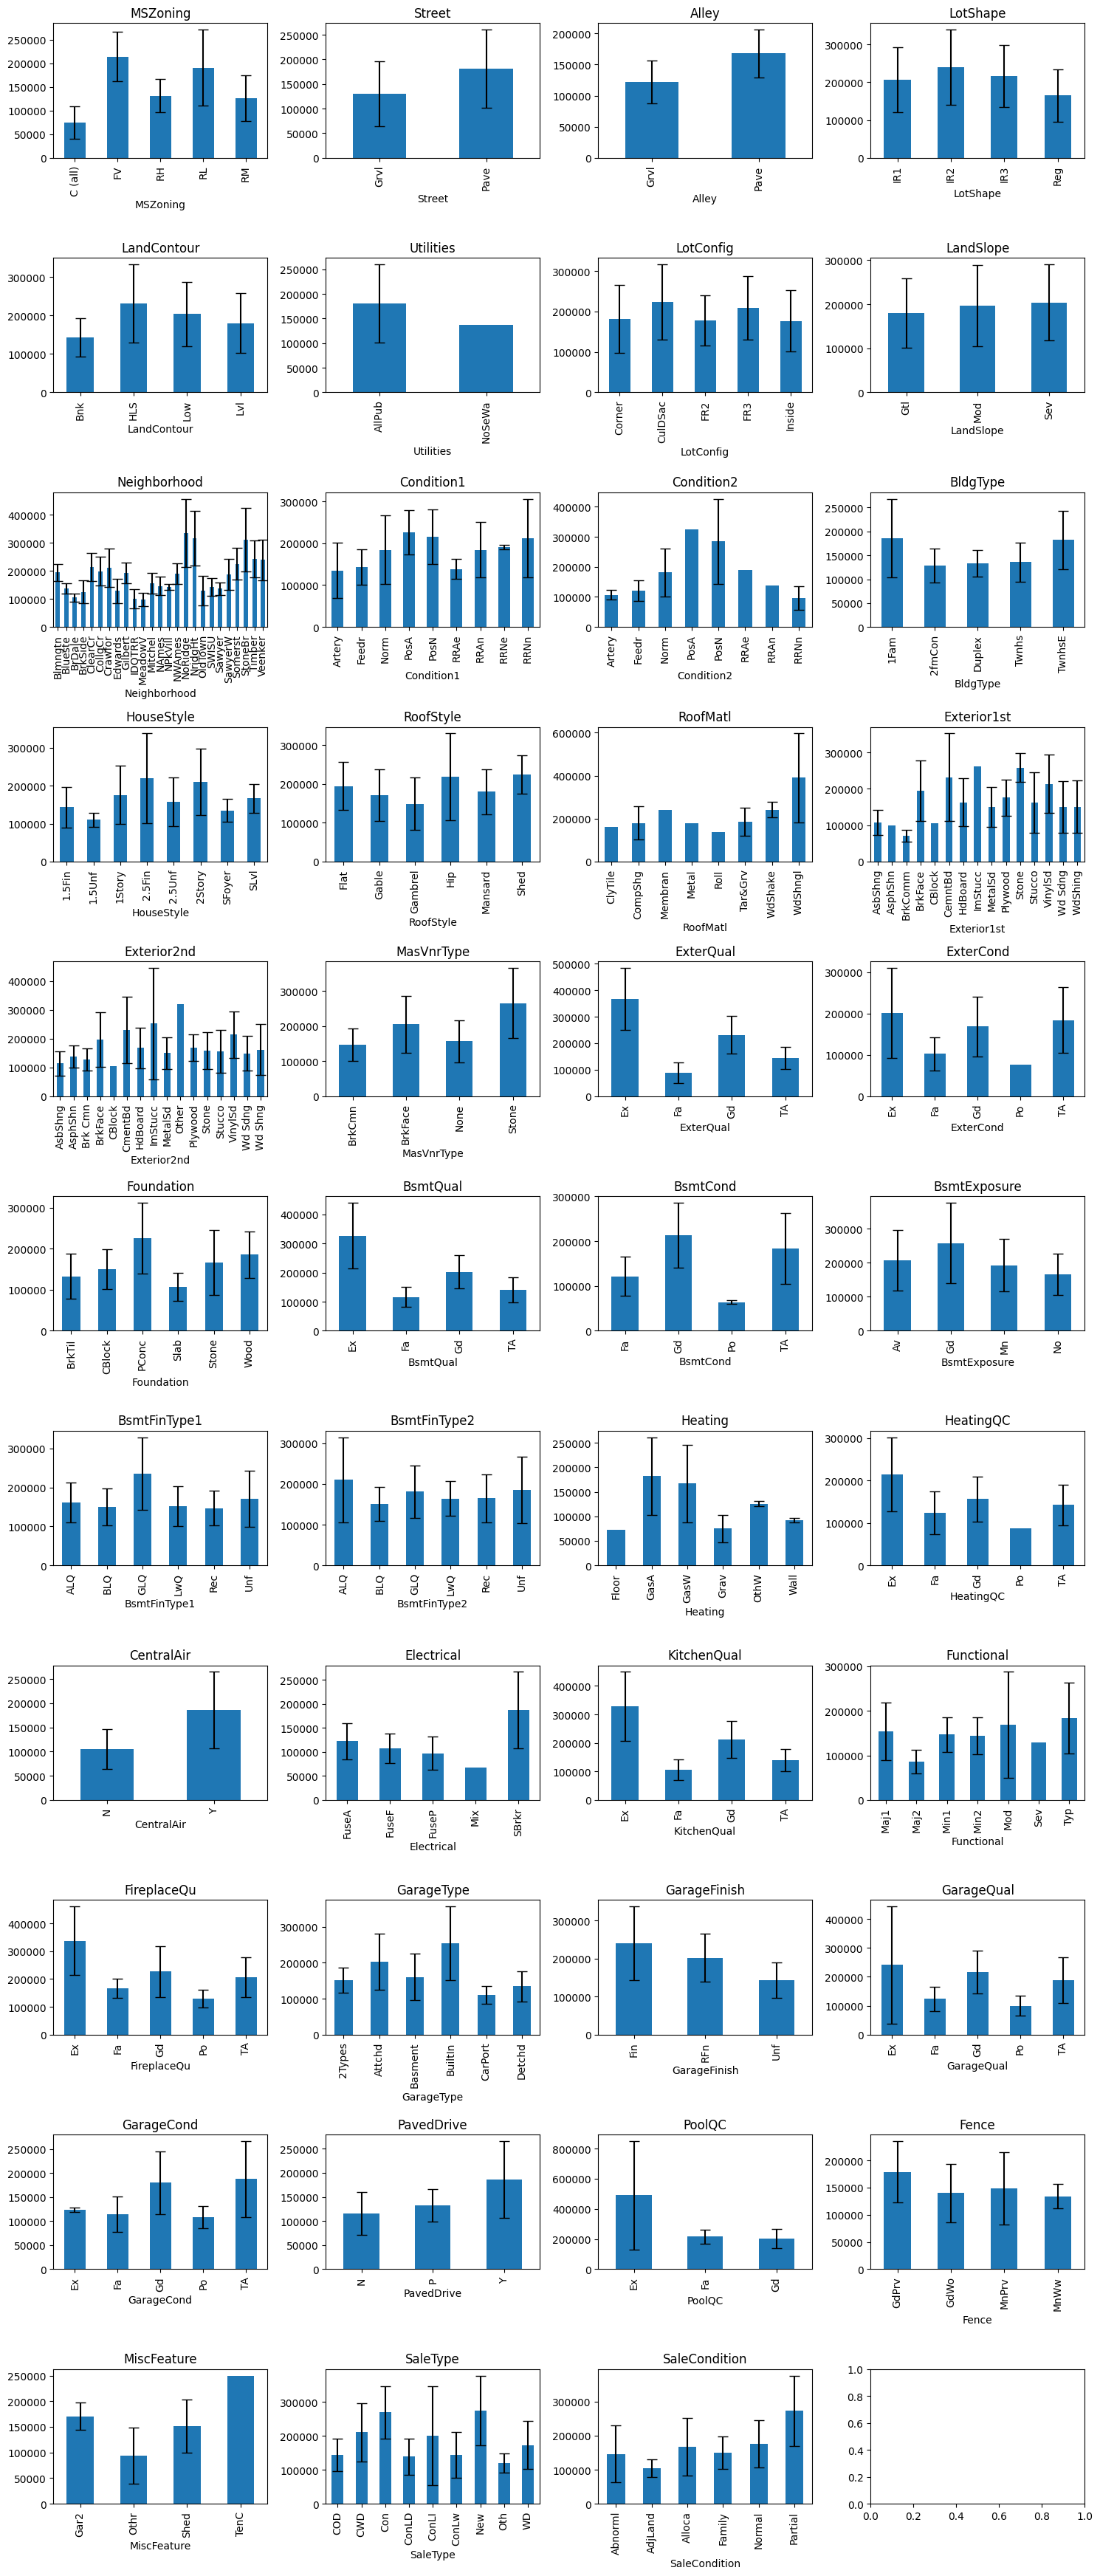

In [ ]:
# Finding correlation (indirectly) between 'object' features and target:
fig, axes = plt.subplots(11,4, figsize=(15,35))
for i, column in enumerate(categorical_columns):
  target_mean = df.groupby(column)['SalePrice'].mean()

  target_std = df.groupby(column)['SalePrice'].std()

  cur_ax = axes[i // 4, i % 4]
  target_mean.plot(kind='bar', ax=cur_ax, yerr=target_std, capsize=5)
  cur_ax.set_title(column)
plt.tight_layout()
plt.show()

In [ ]:
# Object features that show low correlation to target (by indirect impresion):
cat_cols_uncor_w_target = ['LotShape', 'LandContour', 'Utilities', 'LotConfig',
                           'LandSlope', 'Condition2', 'RoofMatl', 'BsmtExposure',
                           'BsmtFinType1', 'BsmtFinType2', 'Electrical',
                           'Functional', 'Fence', 'MiscFiture'
                           ]
len(cat_cols_uncor_w_target)

14

In [ ]:
(df.isna().sum()).sort_values()

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
                 ... 
FireplaceQu       690
Fence            1179
Alley            1369
MiscFeature      1406
PoolQC           1453
Length: 81, dtype: int64

In [ ]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64